# StochRSI

In [ ]:
# to find if an asset is overbought or oversold via Stochastic RSI (Relative Strength Index - stochRSI)
# when stock goes above 0.8 = good time to sell
# when stock goes below 0.2 = good time to buy

# code adapted from @Computer Science on YouTube

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# load data
df = pd.read_csv("C:/Users/Mathe/Desktop/TSLA.csv")

In [11]:
# show the data for TSLA: Oct 14, 2020 - Oct 14, 2021
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-15,450.309998,456.570007,442.500000,448.880005,448.880005,35672400
1,2020-10-16,454.440002,455.950012,438.850006,439.670013,439.670013,32775900
2,2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
3,2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
4,2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
...,...,...,...,...,...,...,...
247,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
248,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
249,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
250,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [12]:
# set date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-10-15,2020-10-15,450.309998,456.570007,442.500000,448.880005,448.880005,35672400
2020-10-16,2020-10-16,454.440002,455.950012,438.850006,439.670013,439.670013,32775900
2020-10-19,2020-10-19,446.239990,447.000000,428.869995,430.829987,430.829987,36287800
2020-10-20,2020-10-20,431.750000,431.750000,419.049988,421.940002,421.940002,31656300
2020-10-21,2020-10-21,422.700012,432.950012,421.250000,422.640015,422.640015,32370500
...,...,...,...,...,...,...,...
2021-10-08,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2021-10-11,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2021-10-12,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2021-10-13,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [14]:
# create an exponential moving average indicator function
# typical time periods for moving averages are 15, 20, and 30
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [15]:
# create function for stochastic RSI
def StochRSI(data, period=14, column='Close'):
    delta = data[column].diff(1) # find discrete difference over column axis with the period value equal to 1
    delta = delta.dropna() # drop any NA's
    up = delta.copy() 
    down = delta.copy()
    up[up<0] = 0 # set all values in up less than 0 equal to 0
    down[down>0] = 0 # set all values in down greater than 0 equal to 0
    data['up'] = up # new column
    data['down'] = down # new column
    AVG_Gain = EMA(data, period, column='up')
    AVG_Loss = abs(EMA(data, period, column='down')) # so we dont get any negative values
    RS = AVG_Gain/AVG_Loss # relative strength
    RSI = 100.0 - (100.0/(1.0 + RS))
    
    stockrsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())
    
    return stockrsi

In [16]:
# store stochastic RSI data in new column
df['StochRSI'] = StochRSI(df)

(array([18567., 18628., 18687., 18748., 18809., 18871., 18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1200x800 with 0 Axes>

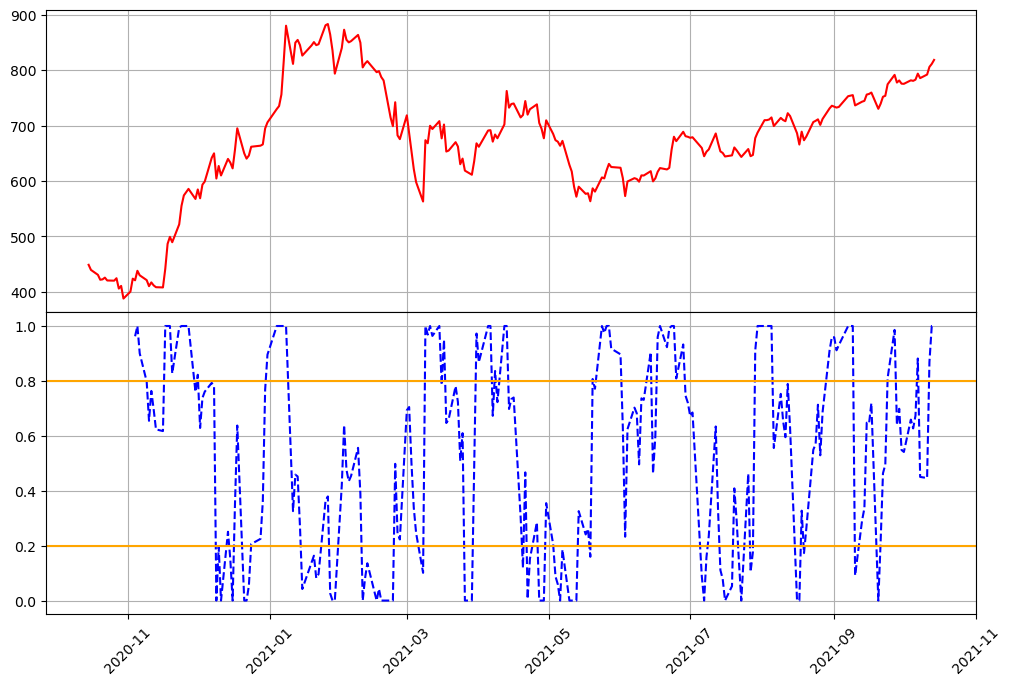

In [27]:
# plot the data (close and StochRSI)
%matplotlib inline
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
# set grid lines
ax1.grid()
ax2.grid()
# plot close price
ax1.plot(df.index, df['Close'], color='r')
# plot the StochRSI
ax2.plot(df.index, df['StochRSI'], color='b', linestyle='--')
# plot the oversold(0.2) and overbought(0.8) lines
ax2.axhline(0.20, color='orange')
ax2.axhline(0.80, color='orange')
# rotate xticks by 45
plt.xticks(rotation=45)

# when stock goes above 0.8 = good time to sell
# when stock goes below 0.2 = good time to buy

# currently it looks like a good time to sell TSLA: Oct 14, 2021

<IPython.core.display.Javascript object>


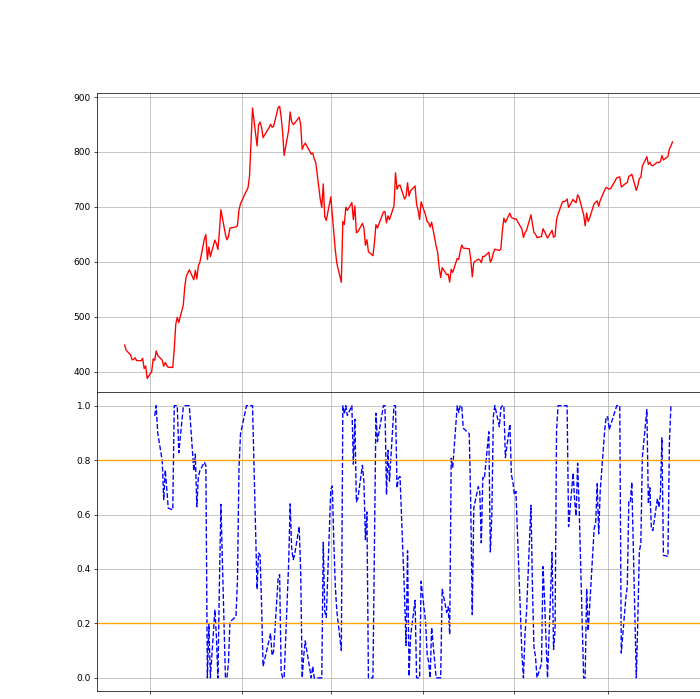

(array([18567., 18628., 18687., 18748., 18809., 18871., 18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [25]:
# lets us mouse over for specific dates
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
# set grid lines
ax1.grid()
ax2.grid()
# plot close price
ax1.plot(df.index, df['Close'], color='r')
# plot the StochRSI
ax2.plot(df.index, df['StochRSI'], color='b', linestyle='--')
# plot the oversold(0.2) and overbought(0.8) lines
ax2.axhline(0.20, color='orange')
ax2.axhline(0.80, color='orange')
# rotate xticks by 45
plt.xticks(rotation=45)